Forward-Backward Splitting
===================================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{\arg\min}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [1]:
using PyPlot

This numerical tour presents the Forward-Backward (FB) algorithm to
minimize the sum of a smooth and a simple function. It shows an
application to sparse deconvolution.

Forward-Backward Algorithm
--------------------------
We consider the problem of minimizing the sum of two functions
$$ E^\star = \umin{x \in \RR^N} E(x) = f(x) + g(x). $$

So, we want to find a vector $x^\star$ solution to the problem, i.e. a minimizer of $E=f+g$.


We assume that $f$ is a $C^1$ function with $\beta$-Lipschitz gradient.



We also assume that $g$ is "simple", in the sense that one can compute exactly and quickly its proximity operator, which is defined as
$$ \text{prox}_{\ga g}(x) = \uargmin{y \in \RR^N} \frac{1}{2}\norm{x-y}^2 + \ga g(y). $$
for any $\ga > 0$.


The forward-backward algorithm reads, after initializing $x^{(0)} \in \RR^N$,
$$ x^{(k+1)} = \text{prox}_{\ga g}\pa{ x^{(k)} - \ga \nabla f( x^{(k)} )  }. $$


If $0 < \ga < 2/\beta$, then this scheme converges to a minimizer of
$f+g$.

Sparse Regularization of Inverse Problems
-----------------------------------------
We consider a linear inverse problem
$$ y = A x^\sharp + w  \in \RR^P$$
where $x^\sharp \in \RR^N$ is the (unknown) signal to recover, $w \in
\RR^P$ is a noise vector, and $A \in \RR^{P \times N}$ models the
acquisition device.


To recover an estimate of the signal $x^\sharp$, we consider  basis
pursuit denoising, which makes use of the $\ell^1$ norm as sparsity
enforcing penalty:
$$ \umin{x \in \RR^N} \frac{1}{2} \norm{A x-y}^2 + \la \norm{x}_1, $$
where the $\ell^1$ norm is defined as
$$ \norm{x}_1 = \sum_i \abs{x_i}. $$


The parameter $\la$ should be set in accordance to the noise level
$\norm{w}$.


This minimization problem can be cast in the form of minimizing $f+g$
where
$$ f(x) = \frac{1}{2} \norm{Ax-y}^2
\qandq g(x) = \la \norm{x}_1. $$


$f$ is smooth; we have
$$ \nabla f(x) = A^* (A x - y),  $$
which is $\beta$-Lipschitz continuous, with
$$ \beta = \norm{ A^* A }. $$


The $\ell^1$-norm is "simple", because its proximal operator is soft
thresholding:
$$ \big(\text{prox}_{\ga g}(x)\big)_n = \max\pa{ 0, 1 - \frac{\la \ga}{\abs{x_n}} } x_n. $$

Signal Deconvolution on Synthetic Sparse Data
-----------------------------------------------------
A simple linearized model of seismic acquisition considers a linear filtering
operator (convolution):
$$ A x = h \ast x $$

The filter $h$ is called the impulse response, or the poind spread function, of the acquisition process $x\mapsto Ax$.

In [2]:
N = 1024;

We define the width of the filter $h$.

In [3]:
s = 5;

We define $h$ as the second derivative of a
Gaussian.

In [4]:
t = -N/2 : N/2 - 1
h = (1-t.^2./s^2).*exp(-(t.^2)./(2*s^2))
h = h - mean(h);

We define the operator $A$. For simplicity, here periodic boundary conditions are used, so that the convolution is efficiently implemented as a product in Fourier domain.

In [5]:
h_tf = fft(fftshift(h))
opA = u -> real(ifft(fft(u) .* h_tf));

We display the filter $h$ and its spectrum (amplitude of its Fourier transform).

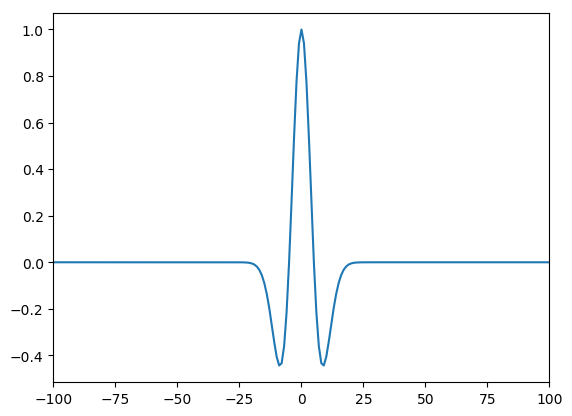

(-100,100)

In [6]:
plot(t, h)
xlim(-100, 100)

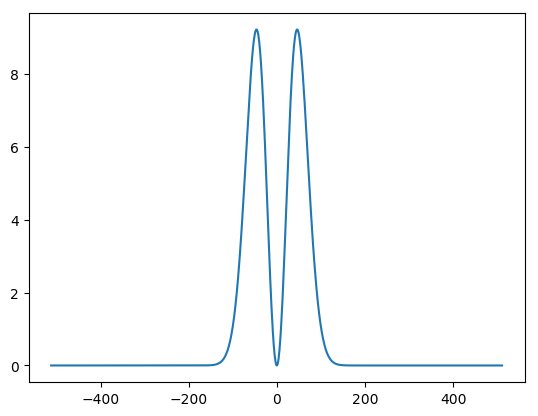

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001E330320>

In [7]:
plot(t, fftshift(abs(h_tf)))

We generate a synthetic sparse signal $x^\sharp$, with only a small number of nonzero
coefficients.

In [8]:
srand(80);

In [9]:
s = Int(round(N*.01)) # number of nonzero elements of xsharp
sel = randperm(N)
sel = sel[1 : s]   # indices of the nonzero elements of xsharp
xsharp = zeros(N)
xsharp[sel] = sign(randn(s)) .* (1 - 0.3*rand(s));

In [10]:
noiselevel = 0.2;

Compute the measurements $y=A x^\sharp + w$ where $w$ is a realization
of white Gaussian noise.

In [11]:
y = opA(xsharp) + noiselevel * randn(N);

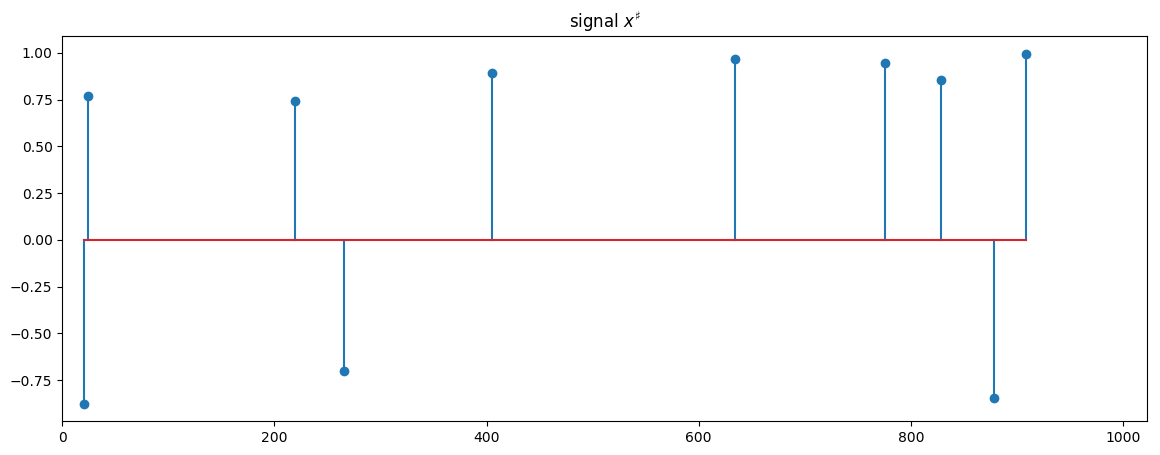

PyObject <matplotlib.text.Text object at 0x000000001E6627B8>

In [12]:
fig = figure(figsize = (14, 5))
stem(sel, xsharp[sel])
xlim(0, N - 1)
title(L"signal $x^\sharp$")

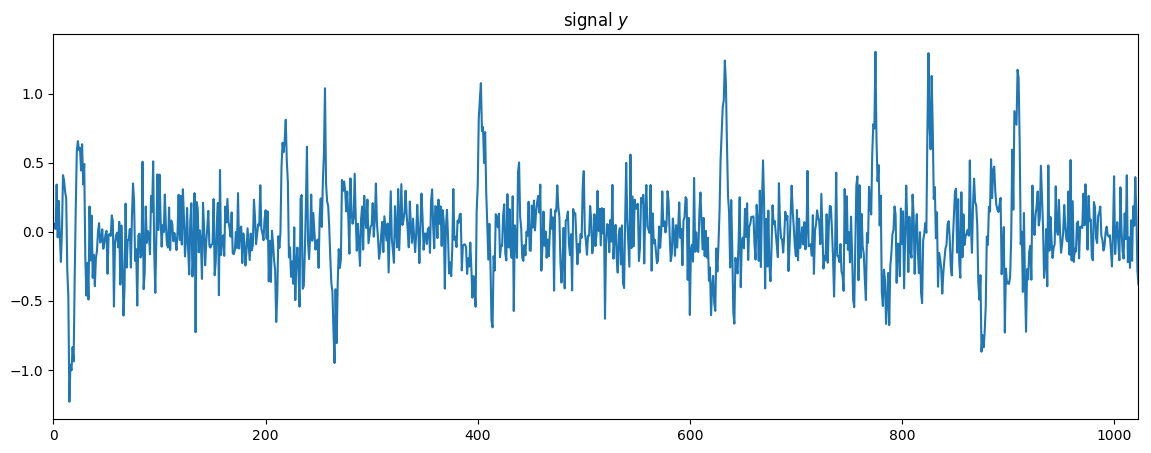

PyObject <matplotlib.text.Text object at 0x0000000001300630>

In [13]:
fig = figure(figsize = (14, 5))
plot(0 : N - 1, y)
xlim(0, N - 1)
title(L"signal $y$")

Deconvolution
---------------------------
We now implement the foward-backward algorithm to recover an estimate of the sparse signal


We define the regularization parameter $\la$.

In [14]:
Lambda = 3;

We define the proximity operator of $\ga g$.

In [15]:
prox_gamma_g = (x, gamma, Lambda) -> x - x./max(abs(x)./(Lambda.*gamma), 1);

We define the gradient operator of $f$. Note that $A^*=A$ because the filter $h$ is symmetric.

<h3>
 <font color='magenta'>
__Exercise: write the code of the function grad_f.__</font></h3>

In [16]:
grad_f = x -> opA(opA(x)-y);

We define the Lipschitz constant $\beta$ of $\nabla f$.

In [17]:
beta = maximum(abs(fft(h)))^2
beta

85.03218404550671

We define the stepsize $\ga$, which must be smaller than $2/\beta$.

In [18]:
gamma = 1.9 / beta;

We compute the solution of $\ell_1$ deconvolution (basis pursuit denoising).
We keep track of the energy $E_k=f(x^{(k)})+g(x^{(k)})$.

<h3>
 <font color='magenta'>
__Exercise: write the code of the forward-backward iteration.__</font></h3>

In [19]:
nbiter = 2000
x = y
En_array = zeros(nbiter + 1)

En_array[1] = vecnorm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1))
for iter in 1 : nbiter  # iter goes from 1 to nbiter
    x = prox_gamma_g(x - gamma.*grad_f(x), gamma, Lambda)
    En_array[iter + 1] = vecnorm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1))
end
x_restored = x

1024-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

We display the result.

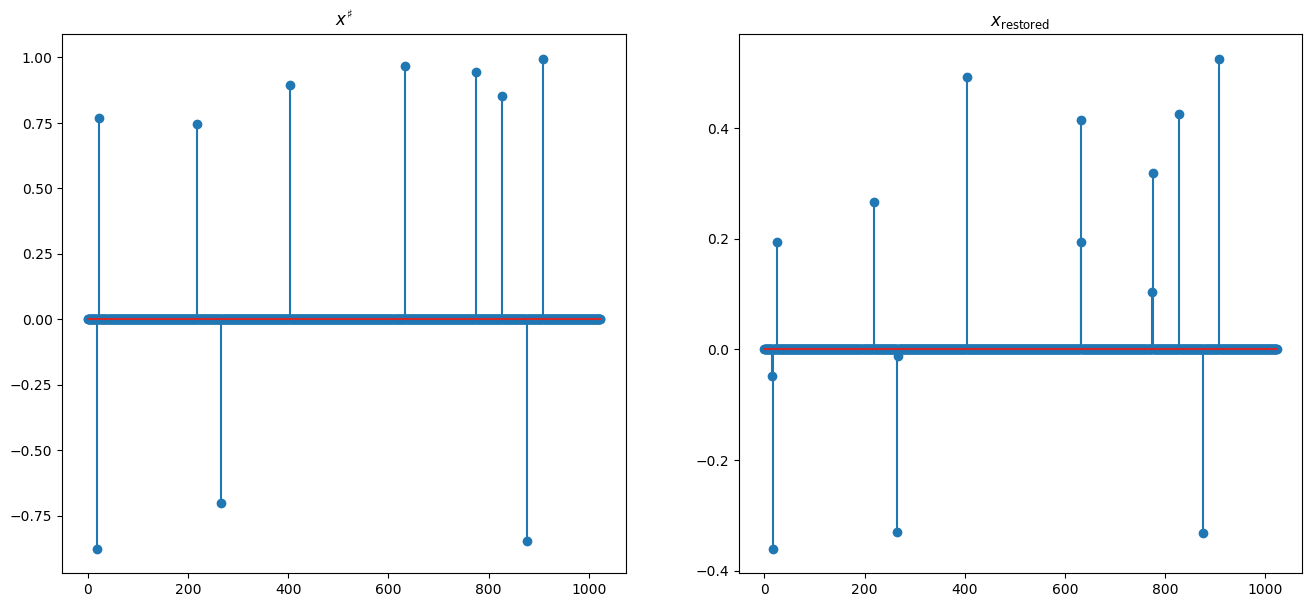

PyObject <matplotlib.text.Text object at 0x0000000001816E10>

In [20]:
fig, (subfig1, subfig2) = subplots(1, 2, figsize = (16, 7)) # one figure with two horizontal subfigures
subfig1[:stem](xsharp)
subfig2[:stem](x_restored)
subfig1[:set_title](L"$x^\sharp$")
subfig2[:set_title](L"$x_\mathrm{restored}$")

We plot the relative error $(E_k-E^\star)/(E_0-E^\star)$ in log-scale with respect to $k$.

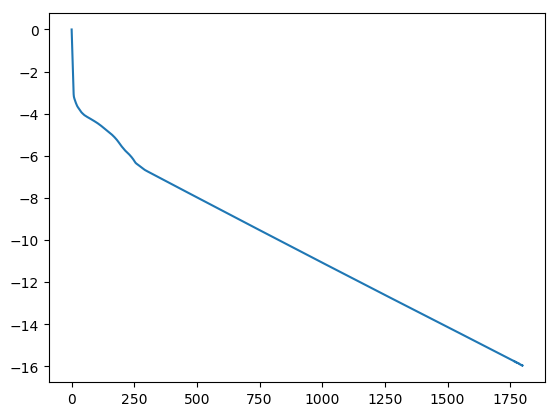

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002486BEF0>

In [22]:
plot(log10((En_array[1 : 1800] - En_array[end])./(En_array[1] - En_array[end])))

Over-relaxed Forward-Backward
-----------------------------
It is possible to introduce a relaxation parameter $\rho$ with $0 < \rho < 1$. The over-relaxed foward-backward algorithm initializes $x^{(0)} \in \RR^N$,
and then iterates, for $k=1,2,\ldots$
$$ z^{(k)} = \text{prox}_{\ga g}\pa{
              x^{(k-1)} - \ga \nabla f( x^{(k-1)} )  }.
$$
$$ x^{(k)} = z^{(k)} +
      \rho \pa{ z^{(k)} - x^{(k-1)} } $$


Let us assume $\gamma=1/\beta$. Convergence of the iterates $x^{(k)}$ and $z^{(k)}$ to a solution is guaranteed
for $ 0 < \rho < 1/2 $. The weaker property of convergence of $ E(x^{(k)}) $
to $E^\star$ is proved, when $ 1/2\leq \rho <1 $.

<h3>
 <font color='magenta'>
__Exercise: write the code of the over-relaxed forward-backward iteration.__</font></h3>

In [23]:
gamma = 1/beta
nbiter = 1700
rho = 0.95
x = y
En_array_overrelaxed = zeros(nbiter + 1)
En_array_overrelaxed[1] = vecnorm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1))
for iter in 1 : nbiter
    xprevious = x
    x = prox_gamma_g(x - gamma.*grad_f(x), gamma, Lambda)
    x += rho .* (x - xprevious)
    En_array_overrelaxed[iter + 1] = vecnorm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1)) 
end
x_restored = x

1024-element Array{Float64,1}:
  6.10273e-41
  7.63647e-40
  2.28668e-39
  2.65729e-39
  2.62089e-39
  3.03083e-39
  2.84395e-39
  1.51463e-39
  1.76634e-39
  1.14123e-39
  1.50583e-40
 -1.15128e-39
 -2.15176e-39
  ⋮          
 -2.23171e-40
 -3.41141e-40
 -5.48555e-40
 -1.13604e-39
 -1.08402e-39
 -1.26237e-39
 -1.72016e-39
 -1.67638e-39
 -2.09366e-39
 -1.21385e-39
 -5.58077e-40
  1.36755e-40

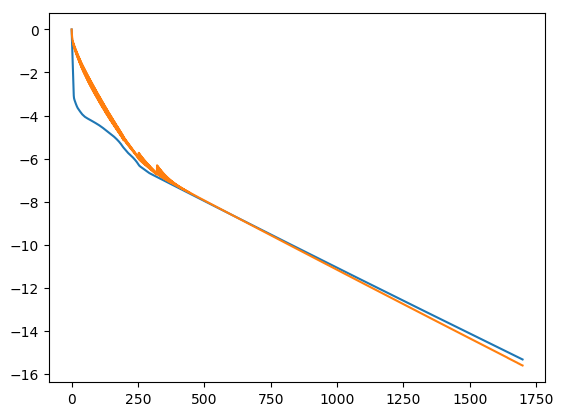

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000294825C0>

In [28]:
plot(log10((En_array[1 : 1700] - En_array[end])./(En_array[1] - En_array[end])))
plot(log10((En_array_overrelaxed[1 : 1700] - En_array[end])./(En_array[1] - En_array[end])))
# I changed 1800 to 1700 because En_array_overrelaxed is of length 1701

As we see, in this example, over-relaxation does not bring any speedup, because $\gamma$ is lower than without over-relaxation. There are other setting parameters or other problems, for which over-relaxation does bring a significant speedup. 

FISTA-like Accelerated Forward-Backward Algorithm
---------------------------
We consider the FISTA algorithm introduced in:


A. Beck and M. Teboulle,
"A Fast Iterative Shrinkage-Thresholding Algorithm for Linear Inverse Problems",
_SIAM Journal on Imaging Sciences_, 2009.

More precisely, we consider a slightly modified version of FISTA, whose convergence is proved, see
A. Chambolle and C. Dossal, "On the convergence of the iterates of "FISTA"", preprint, 2015.

Given an initial estimate $x^{(0)}$ of the solution and a parameter $a>2$, the algorithm sets $\gamma=1/\beta$, sets $z^{(0)}=x^{(0)} \in \RR^N$,
and iterates, for $k=1,2,\ldots$
$$ x^{(k)} = \text{prox}_{\ga g}\pa{
              z^{(k-1)} - \ga \nabla f( z^{(k-1)} )  }.
$$
$$ \alpha_k=(k-1)/(k+a) $$
$$ z^{(k)} = x^{(k)} +
      \alpha_k
  \pa{ x^{(k)} - x^{(k-1)} } $$


It is proved that the iterates $x^{(k)}$ converge to a solution $x^\star$ of the problem. Moreover, 
the  optimal convergence rate for this class of problems is reached,
namely
$$ E_k - E^\star = O(1/k^2), $$
whereas the convergence rate for the normal forward-backward is only
$O(1/k)$.

Note the difference between the over-relaxed forward-backward and the accelerated forward-backward: the later is based on an inertia mechanism, of different nature than over-relaxation.

<h3>
 <font color='magenta'>
__Exercise: write the code of the accelerated forward-backward iteration.__</font></h3>

In [30]:
gamma = 1/beta
nbiter = 1700
a = 10
x = y
En_array_fista = zeros(nbiter + 1)
En_array_fista[1] = vecnorm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1))
z = x
for iter in 1 : nbiter
    xprevious = x
    x = prox_gamma_g(z - gamma.*grad_f(z), gamma, Lambda)
    alpha = iter/(iter + 1 + a)
    z = x + alpha .* (x - xprevious)
    En_array_fista[iter + 1] = norm(opA(x) - y)^2/2 + Lambda*maximum(sum(abs(x), 1))
end
x_restored = x

1024-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

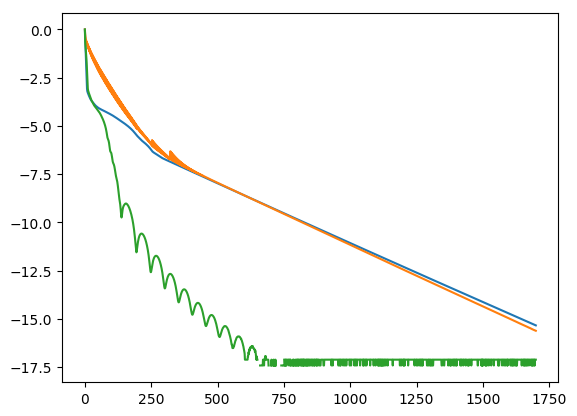

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000023D13748>

In [38]:
plot(log10((En_array[1 : 1700] - En_array[end])./(En_array[1] - En_array[end])))
plot(log10((En_array_overrelaxed[1 : 1700] - En_array[end])./(En_array[1] - En_array[end])))
plot(log10((abs(En_array_fista[1 : 1700] - En_array[end]))./(En_array[1] - En_array[end])))


<h3>
 <font color='magenta'>
__Exercise: try different values of a. You can try a=3,10,30,50,100.__</font></h3>

We can note that the accelerated forward-backward is not monotonic: the cost function E is not decreasing along with the iterations and some oscillations are present.